!!!!PLEASE READ!!!!
!!!!PLEASE READ!!!!
Remember to update scw01 to match your personal user directory! You received this user directory earlier, and you can also find it by opening the R terminal (bottom left of RStudio window, next to the Console tab).
mydir <- "/home1/scw01/"

## Load libraries and set user directory paths.

In [1]:
## https://stackoverflow.com/questions/70025153/how-to-access-the-shell-in-google-colab-when-running-the-r-kernel
shell_call <- function(command, ...) {
  result <- system(command, intern = TRUE, ...)
  cat(paste0(result, collapse = "\n"))
}

loadPackages = function(pkgs){
  myrequire = function(...){
    suppressWarnings(suppressMessages(suppressPackageStartupMessages(require(...))))
  }
  ok = sapply(pkgs, require, character.only=TRUE, quietly=TRUE)
  if (!all(ok)){
    message("There are missing packages: ", paste(pkgs[!ok], collapse=", "))
  }
}

## Setup R2U
download.file("https://github.com/eddelbuettel/r2u/raw/master/inst/scripts/add_cranapt_jammy.sh",
              "add_cranapt_jammy.sh")
Sys.chmod("add_cranapt_jammy.sh", "0755")
shell_call("./add_cranapt_jammy.sh")
bspm::enable()
options(bspm.version.check=FALSE)
shell_call("rm add_cranapt_jammy.sh")

## Install the R packages
cranPkgs2Install = c("dplyr", "ggpubr", "Seurat", "cowplot",
                     "Rtsne", "hdf5r", "patchwork")
install.packages(cranPkgs2Install, ask=FALSE, update=TRUE, quietly=TRUE)

30 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Building dependency tree...
Reading state information...
wget is already the newest version (1.21.2-2ubuntu1).
ca-certificates is already the newest version (20230311ubuntu0.22.04.1).
gnupg is already the newest version (2.2.27-3ubuntu2.1).
gnupg set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
-----BEGIN PGP PUBLIC KEY BLOCK-----

mQINBFM+sY8BEADA70T+U0/2WNjOTLvytuXLvBC4vgA8hYvOaBS1cL3d8lu4mwr4
W84/6p4v/mXle/0eIO2D2g+XfK72ZHZxpS+bb7yPxrkCDLGxwUd/khtTJHSbbKFo
J73AsABflMe+8qv+E74+QTiXErTCNioFRz18sa0EvOnEAiokau6TZVYY2z9YjBNI
yEjTi+z+g8c1RL6VmrFEpTicTpafOLbkRyw0VKnAKG7Ytp3Ksc1G9/IAoKw3Q9La
0DJb5iX6hyB7+PNid6htK4LtPKZ2dNSrnRvNNkjj5BgcM2AT1hmxbzHNzIVmPoKA
CQFrkdjog3/PcyjdtZG7cfoSDXrbIAZeAa2ngLv9C/DJatVDd6maPOe66gLo7+As
ErMvO9vtiouqLdurW+Lhx0jFW9Ca3g1taLfbSDyS3X1mOGWcisbQvBqkIuoDQTeS
V4Z04wrwTZ1HtweKG/s5fmPtZNGWVI5YNRLIwdmbGzFTMPu2XTAOd+xSK2H+46Kh
Sh4kFeP6p

Tracing function "install.packages" in package "utils"



In [2]:
## To simplify package loading, we created the loadPackages()
## function. But, if you don't have the function, you should
## use 'library(name_of_package)'
pkgs = c("Seurat", "dplyr","patchwork")
loadPackages(pkgs)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# UPDATE scw01 DIRECTORY TO MATCH YOUR PERSONAL USER DIRECTORY. THIS IS WHERE YOU READ AND WRITE DATA.
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
mydir <- "/content"

Attaching SeuratObject

‘SeuratObject’ was built under R 4.3.0 but the current version is
4.3.1; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In this lab we will be analyzing multi-modal single cell data. Cells from a non-small cell lung cancer sample were processed with the 10X 5' immune profiling technology which captures RNA and T cell receptor sequence for each cell.
The data was downlaoded from the 10x website:https://www.10xgenomics.com/resources/datasets/nsclc-tumor-1-standard-5-0-0

Please read the description of the sample processing and early analysis steps on the web page.

### Read in raw gene counts and metadata

In [3]:
shell_call("curl -O https://cf.10xgenomics.com/samples/cell-vdj/5.0.0/vdj_v1_hs_nsclc_multi_5gex_t_b/vdj_v1_hs_nsclc_multi_5gex_t_b_count_filtered_feature_bc_matrix.tar.gz")
shell_call("tar -xf /content/vdj_v1_hs_nsclc_multi_5gex_t_b_count_filtered_feature_bc_matrix.tar.gz")

In [4]:
counts <- Read10X(paste0(mydir, "/filtered_feature_bc_matrix/"))

### Create the Seurat Object
We next use the count matrix and metadata to create a Seurat object. The object serves as a container that contains both the raw counts and metadata and downstream analysis (like PCA, or clustering results) for a single-cell RNA-Seq dataset.

In [5]:
seurat.raw <- CreateSeuratObject(
    counts = counts
)

# Show the contents of Seurat object.
seurat.raw

An object of class Seurat 
36601 features across 7092 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)

### Exploring the Seurat Object
The first step of analysis is to gain familiarity with the dataset now stored in the Seurat object. Seurat allows us to explore our count data in conjunction with the associated metadata.

In [6]:
# How many cells and genes do we currently have?
print(paste0("The number of genes is ", dim(seurat.raw)[1], " and the number of cells is ", dim(seurat.raw)[2]))

[1] "The number of genes is 36601 and the number of cells is 7092"


In [7]:
# View a slice of the count data. Rows are genes and columns are cells/barcodes.
GetAssayData(seurat.raw, slot = "counts")[8:10,13:14]

3 x 2 sparse Matrix of class "dgCMatrix"
           AAACGGGAGCTAGTGG-1 AAACGGGAGCTTATCG-1
AL627309.4                  .                  .
AP006222.2                  .                  .
AL732372.1                  .                  .

NOTE: the dots('.') reflect a zero value. The count table is stored in sparse matrix format which explicitly stores only non zero values to save space.

In [8]:
# What metadata columns are available in the Seurat object?
print(colnames(seurat.raw@meta.data))

[1] "orig.ident"   "nCount_RNA"   "nFeature_RNA"


Warning message:
“Removed 708 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 708 rows containing missing values (`geom_point()`).”


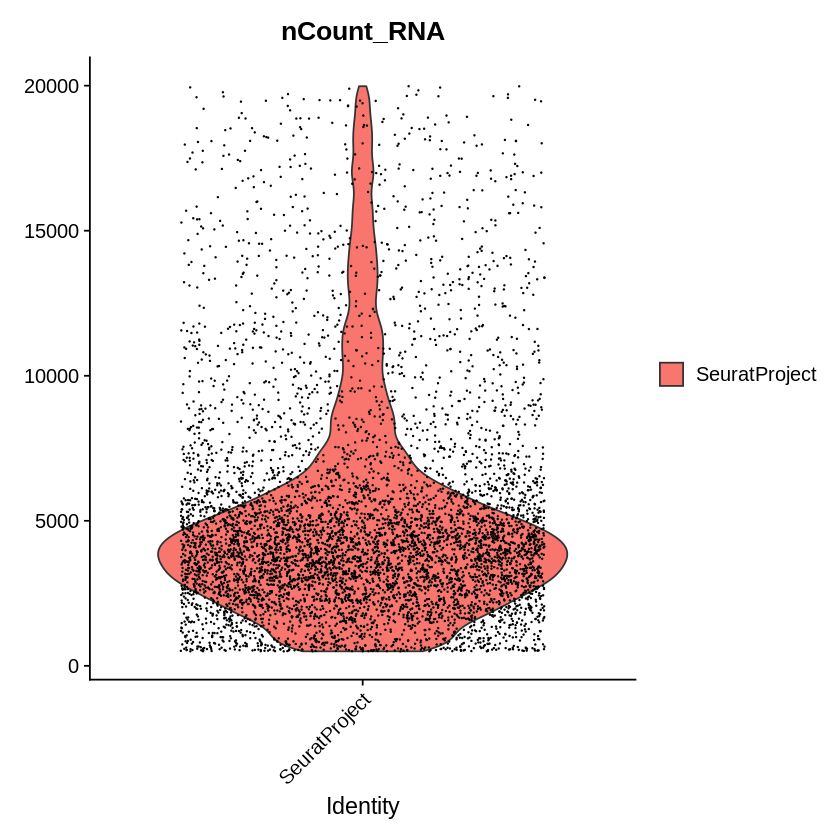

In [9]:
# Create a violin plot showing the distribution of number of UMIs per cell.
options(repr.plot.width=7, repr.plot.height=7)
VlnPlot(seurat.raw, features = c("nCount_RNA"),y.max=2e4)

### Quality Control
We have already seen that two of the main QC metrics (number of UMIs and number of genes detected per cell) were automatically computed by Seurat. The other major QC metric is the percentage of mitochondrial genes. To calculate this metric we are going to use Seurat's PercentageFeatureSet method. PercentageFeatureSet calculates the percent of UMIs coming from genes whose name matches the 'pattern' argument.

In [10]:
# Human mitochondrial gene names start with "MT-" so we'll calculate the percentage of genes matching the pattern "^MT-".
seurat.raw[["percent.mt"]] <- PercentageFeatureSet(seurat.raw, pattern = "^MT-")

# Now we can see that the % mitochondrial gene expression has been calculated for each cell.
head(seurat.raw$percent.mt)

AAACCTGAGCTAGTCT-1 AAACCTGAGGGCACTA-1 AAACCTGAGTACGTTC-1 AAACCTGAGTCCGGTC-1 
         20.463428           3.349908           2.879950           6.119792 
AAACCTGCACCAGGTC-1 AAACCTGCACCTCGTT-1 
          3.172738           2.274314

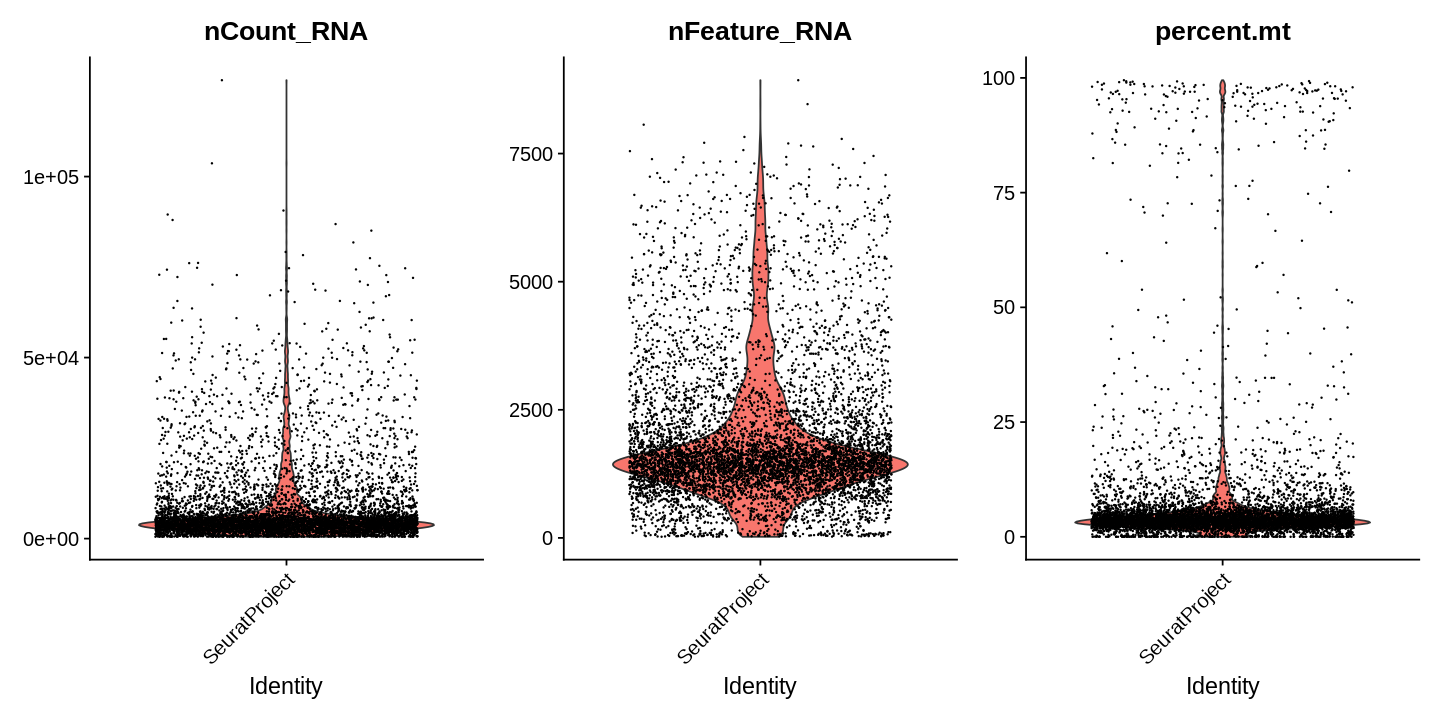

In [11]:
# We can visualize all three of the cell quality metrics together using Seurat's VlnPlot method.
options(repr.plot.width=12, repr.plot.height=6)
VlnPlot(seurat.raw, features = c("nCount_RNA", "nFeature_RNA", "percent.mt"))

It is often helpful to visualize these quality control metrics in conjunction, as cells that are outliers in multiple dimensions are more likely to be low quality cells. Seurat's FeatureScatter creates a scatter plot of two given columns from our metadata.

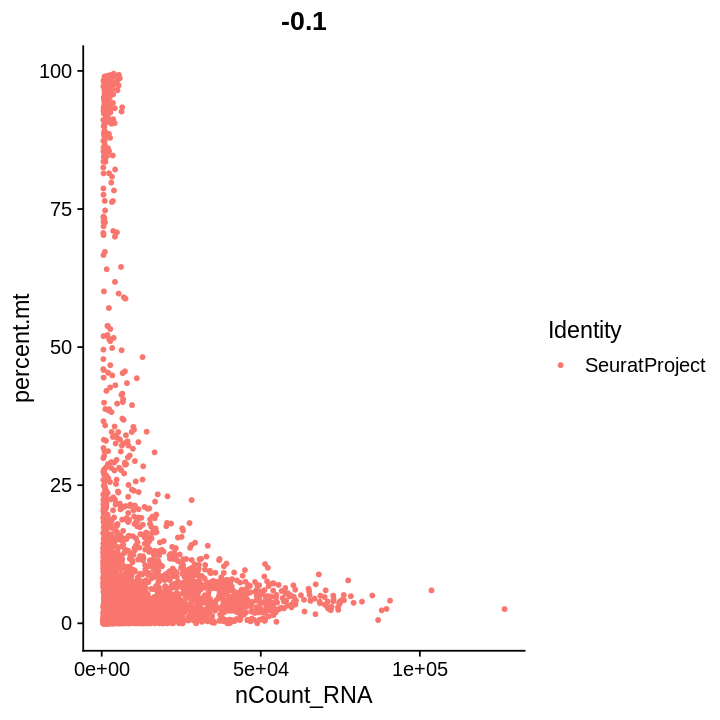

In [12]:
# Here we visualize the number of UMI vs the percentage of mito genes.
options(repr.plot.width=6, repr.plot.height=6)
FeatureScatter(seurat.raw, feature1 = "nCount_RNA", feature2 = "percent.mt")

In [13]:
# Once we've visualized the metrics we can select the thresholds that we want to use to filter.
# We use R's subset method to filter
seurat.raw <- subset(
    seurat.raw,
    subset =
        nFeature_RNA > 200 &
        nCount_RNA > 400 &
        nFeature_RNA < 6000 &
        percent.mt < 40
)

### Normalization
After removing unwanted cells from the dataset, the next step is to normalize the data. The most common approach to normalization in Seurat a global-scaling normalization method “LogNormalize” that normalizes the feature expression measurements for each cell by the total expression in the cell, multiplies these normalized measurements by a scale factor (10,000 by default), and log-transforms the result. The original raw counts data is stored in seurat.raw[["RNA"]]@counts and the new normalized data is stored in seurat.raw[["RNA"]]@data.

In [14]:
seurat.raw <- NormalizeData(seurat.raw, normalization.method = "LogNormalize", scale.factor = 10000)

# Do standard variable genes discovery, scaling, PCA, clustering, and UMAP

Centering and scaling data matrix

PC_ 1 
Positive:  HLA-DPA1, HLA-DRB1, HLA-DRA, HLA-DPB1, HLA-DQA1, FTL, HERPUD1, ALOX5AP, TNF, FCGR2B 
	   ITM2A, PLAC8, PIM2, CD7, IGHA1, CCL5, HLA-DRB5, CST7, ACP5, SPI1 
	   KLRB1, GZMA, CTSW, BATF, PLEK, FAM30A, NKG7, MX1, LINC01857, LGALS1 
Negative:  KRT7, FXYD3, TACSTD2, KRT17, MPZL2, DSP, C19orf33, PTGES, TRIM29, SLPI 
	   CLDN7, DDR1, PERP, S100A16, KRT18, KLF5, SERINC2, S100A2, TNS4, S100A14 
	   S100P, ID1, PKP3, MDK, GPRC5A, AQP3, EMP2, MIR205HG, CD59, SDC1 
PC_ 2 
Positive:  RPS18, CD24, MALAT1, CD7, ITM2A, CCL5, IGHA1, KLRB1, GZMA, FKBP11 
	   PIM2, MYC, AQP3, HOPX, CD8A, GZMK, CTSW, PRF1, TRBC1, FAM30A 
	   TIGIT, DERL3, KLRK1, IGKC, CD40LG, TENT5C, PERP, CXCR6, TNF, JCHAIN 
Negative:  AIF1, LYZ, TYROBP, SERPINA1, FCER1G, FCGR2A, CD68, CD14, MS4A6A, IFI30 
	   CSF1R, CPVL, FCGRT, CST3, MAFB, RNF130, FPR1, SPI1, CD163, TNFSF13 
	   C1QC, MS4A4A, CLEC7A, PLXDC2, C1QA, IGSF6, C1orf162, PILRA, MNDA, CXCL16 
PC_ 3 
Positive:  SPRR1B, RDH10, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6654
Number of edges: 236025

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9741
Number of communities: 8
Elapsed time: 1 seconds


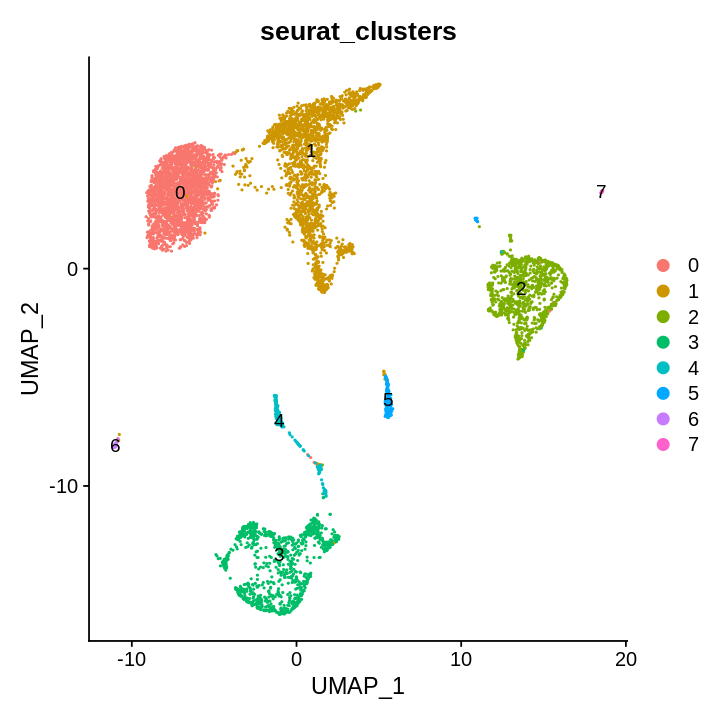

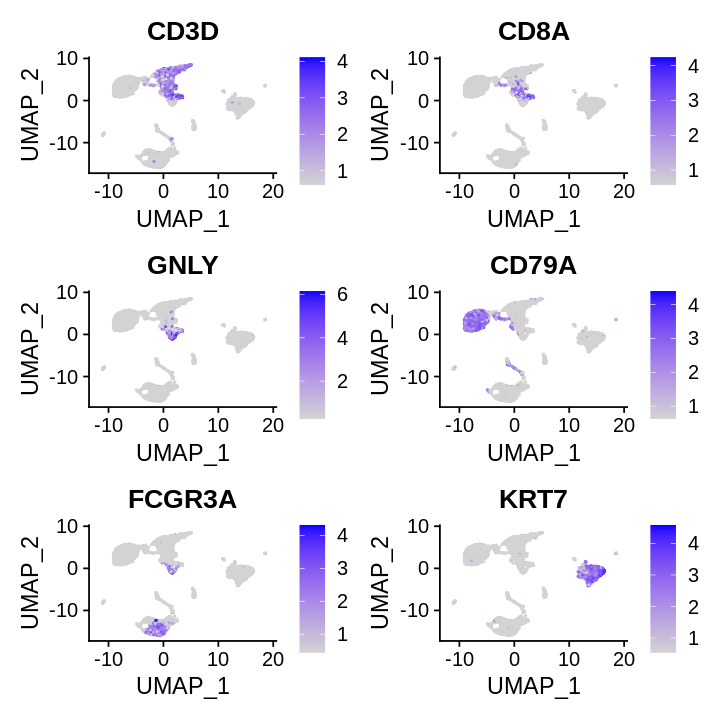

In [15]:
seurat.raw <- FindVariableFeatures(seurat.raw, selection.method = "vst", nfeatures = 2000)
seurat.raw <- ScaleData(seurat.raw, features = VariableFeatures(seurat.raw), do.scale = T, do.center = T)
seurat.raw <- RunPCA(seurat.raw, features = VariableFeatures(seurat.raw))
seurat.raw <- FindNeighbors(seurat.raw, dims = 1:20, k.param = 20)
seurat.raw <- RunUMAP(seurat.raw, dims = 1:20, reduction = "pca", seed.use = 1)

# Find clusters and use a low resolution (0.1 is a good start) so that we can easily identify all of the T cells later
seurat.raw <- FindClusters(seurat.raw, resolution = 0.1)

DimPlot(seurat.raw, reduction = "umap", label = T,group.by = "seurat_clusters")

# Look at the feature plot of common cell type markers to figure out which cluster is T cells
# T cell genes: CD3D, CD8A, GNLY
# B cell gene: CD79A
# Myeloid cell gene: FCGR3A
# Epithelial (lung) cell gene: KRT7
FeaturePlot(seurat.raw, features = c("CD3D", "CD8A", "GNLY", "CD79A", "FCGR3A","KRT7"), min.cutoff = "q1")


### TCR sequence integration
In this section we will read in files generated by the 10X Cellranger software which describe the TCR sequences found in individual cells.

In [16]:
shell_call("curl -O https://cf.10xgenomics.com/samples/cell-vdj/5.0.0/vdj_v1_hs_nsclc_multi_5gex_t_b/vdj_v1_hs_nsclc_multi_5gex_t_b_vdj_t_all_contig_annotations.csv")
shell_call("curl -O https://cf.10xgenomics.com/samples/cell-vdj/5.0.0/vdj_v1_hs_nsclc_multi_5gex_t_b/vdj_v1_hs_nsclc_multi_5gex_t_b_vdj_t_clonotypes.csv")
# Read in TCR information for each cell
tcr <- read.csv(paste0(mydir,"/vdj_v1_hs_nsclc_multi_5gex_t_b_vdj_t_all_contig_annotations.csv"))

# Read in clonotype  info (remember many cells can share the same clonotype, or TCR sequence)
clono <- read.csv(paste0(mydir,"/vdj_v1_hs_nsclc_multi_5gex_t_b_vdj_t_clonotypes.csv"))

# Remove the -1 at the end of each barcode.
# Subsets so only the first line of each cell barcode is kept, so that we ony analyze one clonotype for each cell.
tcr$barcode <- gsub("-1", "", tcr$barcode)
tcr <- tcr[!duplicated(tcr$barcode), ]

# Also remove the -1 at the end of the line of the Seurat object
seurat.raw = RenameCells(seurat.raw,new.names = gsub("-1", "", colnames(seurat.raw)))

# Only keep the barcode and clonotype columns. Adjust the name from "raw_clonotype_id" to "clonotype_id" so
tcr <- tcr[,c("barcode", "raw_clonotype_id")]
names(tcr)[names(tcr) == "raw_clonotype_id"] <- "clonotype_id"

# Merge the TCR and clonotype tables so we have TCR amino acid sequence for each cell
tcr <- merge(tcr, clono[, c("clonotype_id", "cdr3s_aa")])

# Reorder so barcodes are first column, set them as rownames, and remove the unnecessary extra column of barcodes
tcr <- tcr[, c(2,1,3)]
rownames(tcr) <- tcr[,1]
tcr[,1] <- NULL

# Add to the Seurat object's metadata.
seurat.raw <- AddMetaData(object=seurat.raw, metadata=tcr)

# Confirm we have TCR information in the metadata
head(seurat.raw@meta.data)


,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.1,seurat_clusters,clonotype_id,cdr3s_aa
,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<chr>,<chr>
AAACCTGAGCTAGTCT,SeuratProject,3582,1197,20.463428,2,2,NA,NA
AAACCTGAGGGCACTA,SeuratProject,3821,1416,3.349908,0,0,NA,NA
AAACCTGAGTACGTTC,SeuratProject,6389,1799,2.879950,0,0,NA,NA
AAACCTGAGTCCGGTC,SeuratProject,3072,1125,6.119792,0,0,NA,NA
AAACCTGCACCAGGTC,SeuratProject,9361,2661,3.172738,1,1,clonotype522,TRB:CASSWDRYNEQFF;TRA:CAVSGGGSNYKLTF
AAACCTGCACCTCGTT,SeuratProject,47267,5607,2.274314,2,2,NA,NA


[1] 167

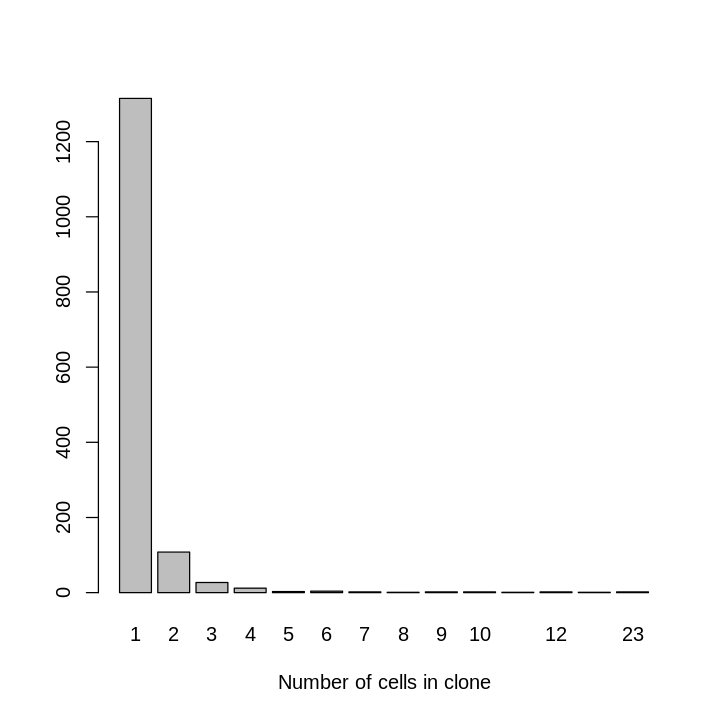

An object of class Seurat 
36601 features across 2035 samples within 1 assay 
Active assay: RNA (36601 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

For a more efficient implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the limma package
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('limma')
--------------------------------------------
After installation of limma, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session

Centering and scaling data matrix



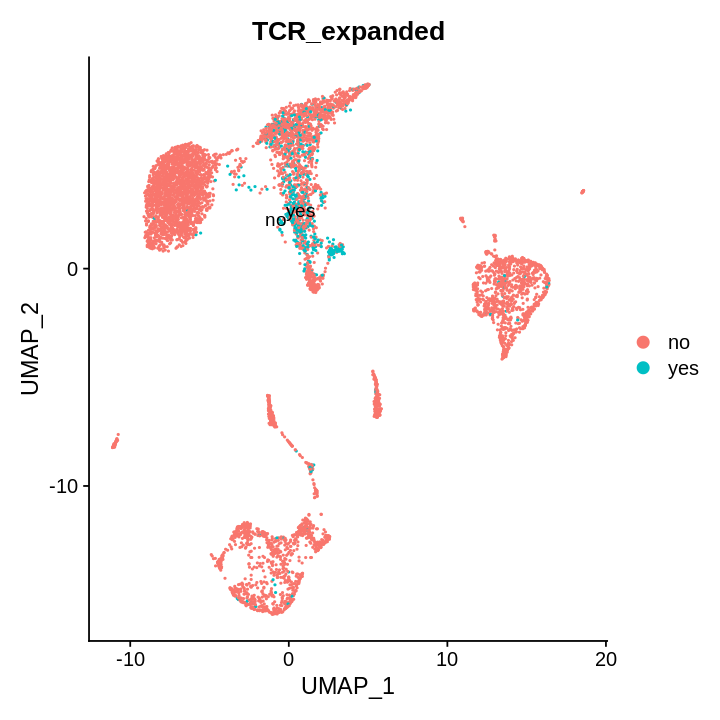

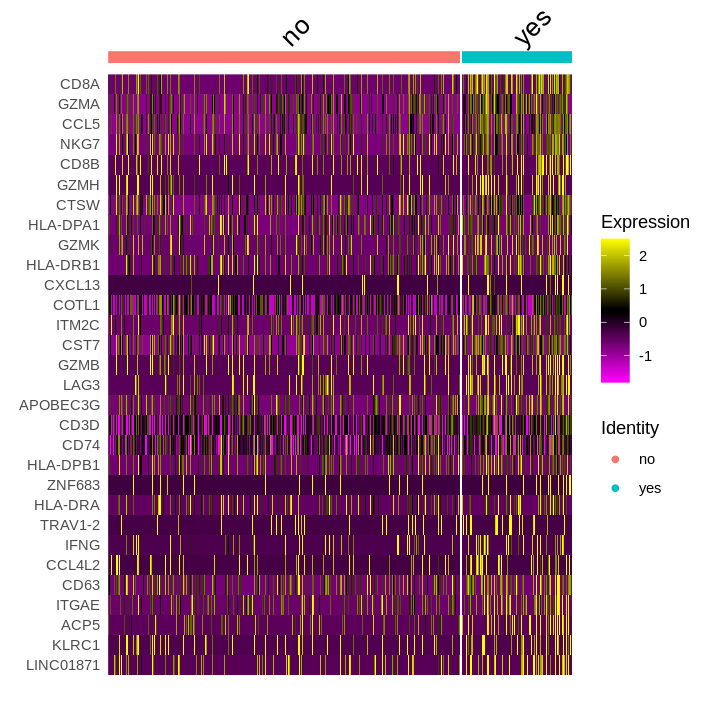

In [17]:
# Generate a gistogram of clone frequencies from clono table
# What is a good threshold to distinguish expanded from non-expanded clones?
barplot(table(clono$frequency),xlab="Number of cells in clone")

# Identity expaned clones, flag in metadata, and label in UMAP
# How many expanded clones are there? Try changing the threshold and compare the results
Nexpand = 1  # this is the threshold we will use to distinguish expanded from non-expanded clones
length(which(clono$frequency>1))
expanded_clones = clono$clonotype_id[clono$frequency>1]

# Add a new metadata column indicating which cells are part of an expanded clone
# We will do this by creating a new metadata where every cell is "no", and then changing the value for the expanded cells to "yes
seurat.raw = AddMetaData(seurat.raw,metadata = rep("no",ncol(seurat.raw)),col.name="TCR_expanded")
seurat.raw@meta.data$TCR_expanded[seurat.raw@meta.data$clonotype_id %in% expanded_clones] = "yes"

# Look at the UMAP to see if expanded clones have similar gene expression
DimPlot(seurat.raw, reduction = "umap", group.by = "TCR_expanded", label = T)

# Do expanded T cells have different genes expressed compared to non-expanded T cells?
# To do ask this question, let's first separate the T cells from the rest of the object
# Check your clustering to see which one looks like it contains T cells

Idents(seurat.raw) = "seurat_clusters"
seurat.t = subset(seurat.raw, idents = "1")
seurat.t # Check the number of samples (cells) to see how many T cells we have to work with

Idents(seurat.t) = "TCR_expanded"
deg_expanded = FindMarkers(seurat.t,ident.1="yes",ident.2="no",logfc.threshold = 0.25,min.pct = 0.1)

# Visualize the expression of the top DE genes for each annotated cell subset.
top30genes <- deg_expanded %>% filter(avg_log2FC > 0) %>% top_n(30, avg_log2FC)
genes <- rownames(top30genes)
seurat.t <- ScaleData(seurat.t, features = genes, do.center = T, do.scale = T)
DoHeatmap(seurat.t, features = genes)
